# World War I Music Scores from the State Library of Queensland 
The data for this notebook is available on the [Queensland Government Open Data Portal](https://www.data.qld.gov.au/dataset/state-library-of-queensland-music-queensland-world-war-1). 

## Get Data

In [1]:
# The following cell is based on Using_Jupyter_notebooks excercises 
# Import external package 
import requests

# Base URL for requests 
url = 'https://www.data.qld.gov.au/api/3/action/datastore_search?resource_id=1275335e-72c8-4848-ae39-94275defe86d'

# Query the API
response = requests.get(url)

# Extract the results as JSON
results = response.json()
results

{'help': 'https://www.data.qld.gov.au/api/3/action/help_show?name=datastore_search',
 'success': True,
 'result': {'include_total': True,
  'resource_id': '1275335e-72c8-4848-ae39-94275defe86d',
  'fields': [{'type': 'int', 'id': '_id'},
   {'info': {'notes': '', 'type_override': '', 'label': ''},
    'type': 'text',
    'id': 'Title'},
   {'info': {'notes': '', 'type_override': '', 'label': ''},
    'type': 'text',
    'id': 'Creator'},
   {'info': {'notes': '', 'type_override': '', 'label': ''},
    'type': 'text',
    'id': 'Subjects'},
   {'info': {'notes': '', 'type_override': '', 'label': ''},
    'type': 'text',
    'id': 'Description'},
   {'info': {'notes': '', 'type_override': '', 'label': ''},
    'type': 'text',
    'id': 'Publisher'},
   {'info': {'notes': '', 'type_override': '', 'label': ''},
    'type': 'text',
    'id': 'Contributor'},
   {'info': {'notes': '', 'type_override': '', 'label': ''},
    'type': 'text',
    'id': 'Format'},
   {'info': {'notes': '', 'type_o

In [2]:
records = results['result']['records']
records

[{'_id': 1,
  'Title': 'Brothers in arms patriotic song',
  'Creator': 'Herbert, R. Molyneux.',
  'Subjects': 'light-horsemen Australian flags',
  'Description': 'n/a',
  'Publisher': 'State Library of Queensland',
  'Contributor': 'n/a',
  'Format': 'Digital format: image/jpeg Original format: 1 score (6) p. ; 35 cm.',
  'Source': 'Copied and digitised from Brothers in arms patriotic song / words and music by R. Molyneux Herbert Brisbane, Qld. : Chivers and Co, [ca. 1900]. Item is held by State Library of Queensland.',
  'Temporal': 'ca 1900',
  'Rights statement': 'Copyright expired. For further information http://www.slq.qld.gov.au/home/copyright',
  'URL': 'http://hdl.handle.net/10462/comp/1205'},
 {'_id': 2,
  'Title': 'Soldiers of the willow',
  'Creator': 'Zelman, Alberto,1874-1927',
  'Subjects': 'War songs--Australia Patriotic music--Australia Songs, English--Australia Cricket--Songs and music Popular music--Australia',
  'Description': 'n/a',
  'Publisher': 'State Library of 

In [11]:
# How to pick a random number and save it to num variable
from random import randint
max = len(records)
num = randint(0,max)
message = "Random number between 0 and "+str(max)+": "+str(num)
print(message)

Random number between 0 and 12: 2


In [12]:
# Get random title from the records
records[num]['Title']

'The Day of victory song'

In [13]:
# Get the score URL of the random title 
url = records[num]['URL']
url

'http://hdl.handle.net/10462/comp/1212'

## Text Blob Translations

In [14]:
# Make string of titles from json array in lowercase
i = 0
text = ""
while i < len(records):
    text += " "+records[i]['Title'].lower()
    i += 1
text

" brothers in arms patriotic song soldiers of the willow the day of victory song boys of australia hear our soldiers' cry joy bells are ringing the kennedy regiment waltz our boys at the front military song the song of the 42nd battalion, a.i.f. black watch junr. when i march home the liberty song of australia"

In [15]:
from textblob import TextBlob
blob = TextBlob(text)
blob

TextBlob(" brothers in arms patriotic song soldiers of the willow the day of victory song boys of australia hear our soldiers' cry joy bells are ringing the kennedy regiment waltz our boys at the front military song the song of the 42nd battalion, a.i.f. black watch junr. when i march home the liberty song of australia")

In [18]:
#Show noun phrases in blob
nouns = ""
for np in blob.noun_phrases:
    print(np)
    nouns += np+" "    
nouns
blob = TextBlob(nouns)
blob

arms patriotic song soldiers victory song boys cry joy bells kennedy regiment waltz
military song 42nd battalion i march home liberty song


TextBlob("arms patriotic song soldiers victory song boys cry joy bells kennedy regiment waltz military song 42nd battalion i march home liberty song ")

In [19]:
spanish = blob.translate(to="es")
spanish

TextBlob("armas canción patriótica soldados canción de victoria muchachos llorar alegría campanas regimiento de Kennedy vals canción militar 42o batallón marcho a casa canción de la libertad")

In [20]:
back_to_english = spanish.translate(to="en")
back_to_english

TextBlob("weapons patriotic song soldiers victory song boys cry joy bells Kennedy regiment waltz military song 42nd battalion march home liberty song")

## Wordcloud

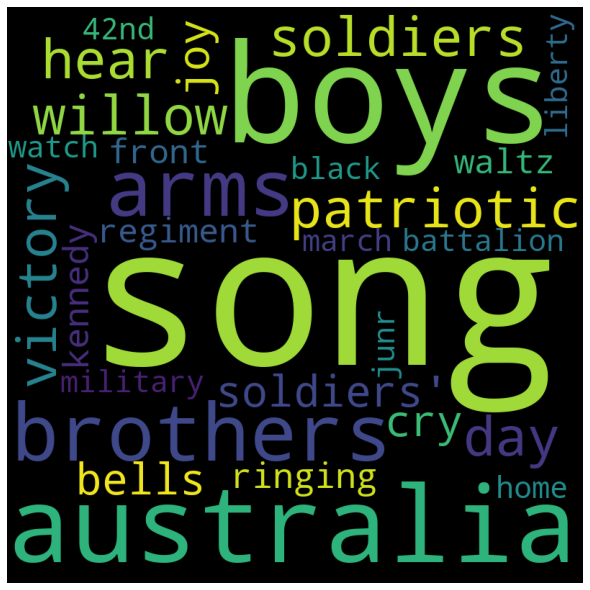

In [21]:
# Wordcloud source from https://www.geeksforgeeks.org/generating-word-cloud-python
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

stopwords = set(STOPWORDS) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

The End